# Homework 4 Problem 2 

For this problem, we are exploring the Cepheid variables that Henrietta Leavitt observed over a hundred years ago, with the goal of first determining the absolute magnitude of the stars, and then utilizing that information, alongside a Cepheid vairable to determine the distance to the star. We are given two CSVs for this problem: one with multiple Cepheid variables that Leavitt observed, and the other with more specific observations of a Cepheid variable. It's easiest to tackle this problem in two steps, part A and part B. In part A, we will tackle finding the absolute magnitude and identifying trends in the data. In part B, we will determine the distance to the particualr star described, using the information given to us as well as the information determined in part A.

### Part A

It is important to import several Python libraries to make data investigation, manipulation,and visualization easier. We import pandas, numpy, matplotlib (specifcally the sub library of pyplot) and the math library as well as the fft and signal sublibraries of scipy.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
import scipy.fft
from scipy.signal import lombscargle, find_peaks

We then need to read in our first CSV and examine it to determine what we have to work with. 

When we look at the data, we see that we are given the Harvard identification number, the minimum and maximum apparent magnitudes, and the observed period in days. 

In [2]:
data = pd.read_csv("C:\\Users\\lazyp\\Desktop\\Willamette Univeristy\\SPRING 2024\\data275\\homework-4-kendall-and-sam-main\\data\\leavitt_cepheids.csv")
data

,Harv_Num,m_max,m_min,period_d
0,1505,14.8,16.1,1.25336
1,1436,14.8,16.4,1.66370
2,1446,14.8,16.4,1.76200
3,1506,15.1,16.3,1.87502
4,1413,14.7,15.6,2.17352
5,1460,14.4,15.7,2.91300
6,1422,14.7,15.9,3.50100
7,842,16.6,16.1,4.28970
8,1425,14.3,15.3,4.54700
9,1742,14.3,15.5,4.98660


Well, since we have the minimum and the maxmimum apparent magnitude of the stars, it makes sense for our next step to be finding the average so when we calculate the absolute magnitude, we know we are using a middle-of-the-road value, instead of a possible outlier. We calculate and save our average to a variable called 'average_apparent_magnitude'.

In [3]:
data['average_apparent_magnitude']= (data['m_min']+data['m_max'])/2

Next, we need to plot our data. Nothing gives a better sense of what we are dealing with than examining it on a plot. When we plot the period of our observations versus the average apparent magnitude we calculated earlier, we are able to see a linear relationship.

Text(0, 0.5, 'Average Apparent Magnitude')

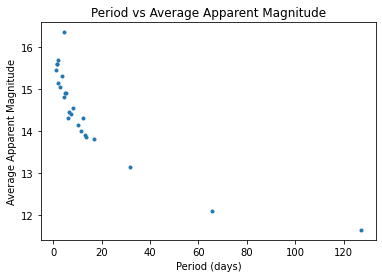

In [4]:
plt.plot(data.period_d, data.average_apparent_magnitude, '.')
plt.title('Period vs Average Apparent Magnitude')
plt.xlabel('Period (days)')
plt.ylabel('Average Apparent Magnitude')

We need to then need to calculate a slope and y-intercept to test our theory of this data having a linear relationship. We do this using the polyfit function from the numpy library, and save our results to variables aptly named 'slope' and 'intercept'. From this, we are able to learn that the slop of our data is -0.032, while our intercept is 14.97.

In [5]:
slope, intercept = np.polyfit(data.period_d, data.average_apparent_magnitude, 1)
print("The Slope is:",slope)
print("The Intercept is:", intercept)

The Slope is: -0.03296162452072366
The Intercept is: 14.97702820256748


We can then test the accuracy of our slope and intercept by plotting a line with our given slope and intercept against our data. We can see that while not 100% accurate, our line gives a good explanation of the trend the data presents.

Text(0, 0.5, 'Average Apparent Magnitude')

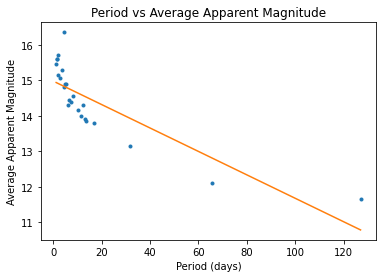

In [6]:
plt.plot(data.period_d, data.average_apparent_magnitude, '.')
plt.plot(data.period_d, slope*data.period_d+intercept)
plt.title('Period vs Average Apparent Magnitude')
plt.xlabel('Period (days)')
plt.ylabel('Average Apparent Magnitude')

Next, we need to consider a log based scale. Our magnitude is already in a log scale, and thus we need to make our period in log scale as well. We accomplish this with a simple line of code using the log function from numpy, and save the output as a column in our dataset called 'logperiod'.

In [7]:
data['logperiod']=np.log(data['period_d'])

Now, we need to get a new slope and intercept, one calculated with the logperiod instead of the normal period we used before. Once again, we do this using the polyfit function from numpy and save our results as variables named slope and intercept. We learn that on this log scale, our slope is -0.899, and our intercept is 16.23.

In [8]:
slope, intercept = np.polyfit(data.logperiod, data.average_apparent_magnitude, 1)
print("The Slope is:",slope)
print("The Intercept is:", intercept)

The Slope is: -0.8990709360564073
The Intercept is: 16.233598834925584


Now, we need to check and see if this log-log scale still fits the data. We do that by plotting the data with our new slope and intercept on top of the data. When we do this, we see a much clearer linear relationship between the period and average apparent magnitude. 

Text(0, 0.5, 'Average Apparent Magnitude')

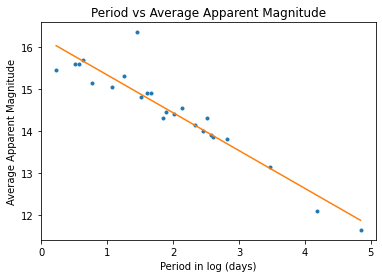

In [9]:
plt.plot(data.logperiod, data.average_apparent_magnitude, '.')
plt.plot(data.logperiod, slope*data.logperiod+intercept)
plt.title('Period vs Average Apparent Magnitude')
plt.xlabel('Period in log (days)')
plt.ylabel('Average Apparent Magnitude')

We have been using average apparent magnitude, which while useful, is not what we want to use going forward. So, we calculate the average absolute magnitude, and save it to a column of the same name. 

In [10]:
M= 5*math.log10(((49.97*1000)/10))
data['average_absolute_magnitude']=data['average_apparent_magnitude']-M

We then use the average absolute magnitude to extract a new slope and intercept, using numpy's polyfit function. We once again save these values as variables with the same names. With this, we learn that the slope is -0.899 and the intercept is -2.259.

In [11]:
slope, intercept = np.polyfit(data.logperiod, data.average_absolute_magnitude, 1)
print("The Slope is:",slope)
print("The Intercept is:", intercept)

The Slope is: -0.8990709360564089
The Intercept is: -2.2599479122873407


We then plot the period (on a log scale) and the average absolute magnitude to double check the accuracy of our line. When examining the plot, we can clearly see that the line fits our data well. Thus, we keep these variables for later, and move onto the second part of the question. 

Text(0, 0.5, 'Average Absolute Magnitude')

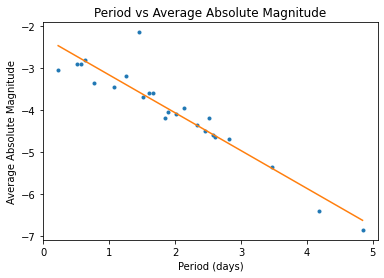

In [12]:
plt.plot(data.logperiod,data.average_absolute_magnitude,'.')
plt.plot(data.logperiod, slope*data.logperiod+intercept)
plt.title('Period vs Average Absolute Magnitude')
plt.xlabel('Period (days)')
plt.ylabel('Average Absolute Magnitude')

### Part B

In this part of the question, we are given a second CSV which contains the light curve of a particular Cepheid variable star. Our goal is to determine how far away this star is in parsecs using our findings from part A. First, we need to read in this new CSV and examine the data. 

In [13]:
data2 = pd.read_csv("C:\\Users\\lazyp\\Desktop\\Willamette Univeristy\\SPRING 2024\\data275\\homework-4-kendall-and-sam-main\\data\\cepheid_lightcurve.csv")

We can see that this data contains a column named HJD, which stants for Heliocentric Julian Day, as well as a column called V_mag which is the apparent magnitude in the visual band. 

In [14]:
data2.head(20)

,HJD,V_mag
0,2.454438e+06,4.3136
1,2.454440e+06,3.6690
2,2.454441e+06,3.9369
3,2.454448e+06,4.2614
4,2.454450e+06,3.4627
5,2.454451e+06,3.7435
6,2.454453e+06,4.1927
7,2.454455e+06,3.6357
8,2.454459e+06,4.3210
9,2.454460e+06,4.0087


To begin determining the distance, first we need the period of the star. We do this using the Lomb-Scargle method. We set a minimum and maximum period, 1 to 10 days, and calculate the freqencies produced by the star. 

In [15]:
#power= scipy.fft.rfft2(data2)
period_max =1
period_min=10
afreqs=2*np.pi*np.linspace(1/period_max, 1/period_min,10000)

We then use these frequenices with the Lob-Scargle method to determine the power. 

In [16]:
power= lombscargle(data2.HJD, data2.V_mag,afreqs, precenter= True)

Next, we can plot this out to determine the period, which we do by finding the highest peak on the Lomb-Scargle periodogram, and extracting its location. When we look at the periodogram, we can see that the highest peak seems to be around 5 days, but we can be more specific. 

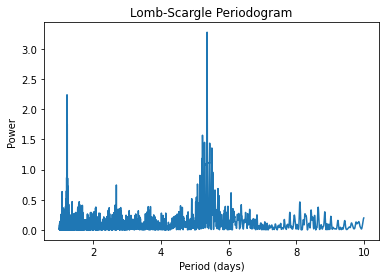

In [17]:
plt.plot(2 * np.pi / afreqs, power)
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram')
plt.show()

We can be more specific by utilizing the find peaks function from scipy's sublibrary signal. From this, we are given the location in the array, 9040.

In [18]:
find_peaks(power, height = 3)

(array([9040], dtype=int64), {'peak_heights': array([3.27516262])})

We can then use this 9040 to extract the number from the frequency. We then use this as the denominator, with 2*pi in the top to get a period of days. With this, we can say that the star has period of 5 days. 

In [19]:
period=2*np.pi/afreqs[9040]
period

5.367149758454107

Next, we need to calculate the average apparent magnitude and average absolute magnitude of our star, which we do simply by taking the mean. We save the results to variables named apparent_magnitude_star and absolute_magnitude_star.

In [20]:
apparent_magnitude_star = data2.V_mag.mean()  
absolute_magnitude_star = data['average_absolute_magnitude'].mean()


With our apparant and absolute magnitude, paried with our period we can determine the distance to this star in parsecs. The distance to this Cepheid star is 301.51 parsecs. Thus, we have determined the distance like the question asked.

In [21]:
distance_parsecs = 10**((apparent_magnitude_star - absolute_magnitude_star + period) / period)
distance_parsecs

301.51448757959446